# Spotify Top East Asian Tracks and Artists - An Exploratory Analysis
This is an exploratory analysis conducted on the Spotify's dataset abou the East Asian top tracks and artists. The steps followed were,
 - __Data Loading:__ Loaded the .csv file from local folder
 - __Data Cleaning:__ Making sure to remove discrepencies with the data like finding duplicates, handling missing values and so on
 - __Exploratory Data Analysis:__ Top 50 tracks are considered based on popularity and potental important variables are analysed for dependencies with the track popularity

## Data Loading

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
top_artist = pd.read_csv('east_asia_top_artists.csv')
top_artist.head()

,Unnamed: 0,artist_name,popularity,followers,artist_link,genres,top_track,top_track_album,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit,top_track_album_link,top_track_link,query_genre
0,0,BTS,88,67507448,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,"['k-pop', 'k-pop boy group', 'pop']",Left and Right (Feat. Jung Kook of BTS),CHARLIE,88.0,2022-10-06,154486.0,False,https://open.spotify.com/album/5Jk4Eg7pxYhDrWJ...,https://open.spotify.com/track/5Odq8ohlgIbQKMZ...,j-pop
1,1,BLACKPINK,82,43385244,https://open.spotify.com/artist/41MozSoPIsD1dJ...,"['k-pop', 'k-pop girl group', 'pop']",Shut Down,BORN PINK,79.0,2022-09-15,175889.0,False,https://open.spotify.com/album/0kbZ4ZNRs76sSFe...,https://open.spotify.com/track/7gRFDGEzF9UkBV2...,j-pop
2,2,TWICE,79,18278225,https://open.spotify.com/artist/7n2Ycct7Beij7D...,"['k-pop', 'k-pop girl group', 'pop']",MOONLIGHT SUNRISE,READY TO BE,75.0,2023-03-10,180320.0,False,https://open.spotify.com/album/7hzP5i7StxYG4St...,https://open.spotify.com/track/5IN9W6eUfk3014M...,j-pop
3,3,j-hope,70,15407840,https://open.spotify.com/artist/0b1sIQumIAsNbq...,"['k-pop', 'k-rap']",on the street (with J. Cole),on the street (with J. Cole),83.0,2023-03-03,214701.0,True,https://open.spotify.com/album/70xdtgH5XuYTqBN...,https://open.spotify.com/track/5wxYxygyHpbgv0E...,j-pop
4,4,V,66,14088149,https://open.spotify.com/artist/3JsHnjpbhX4Sny...,"['j-division', 'korean ost']",Christmas Tree,Our Beloved Summer (Original Television Soundt...,84.0,2021-12-24,209946.0,False,https://open.spotify.com/album/4210mSQ3r10AsJM...,https://open.spotify.com/track/186NCtNk1tUYS7c...,korean


## Understanding the dataset 

We use the functions like shape, describe and look at the columns of the dataset and its datatypes to understand the data and to decide what kind of insights can be drawn out of it.

In [4]:
top_artist.shape 

(700, 15)

In [5]:
top_artist.head(10)

,Unnamed: 0,artist_name,popularity,followers,artist_link,genres,top_track,top_track_album,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit,top_track_album_link,top_track_link,query_genre
0,0,BTS,88,67507448,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,"['k-pop', 'k-pop boy group', 'pop']",Left and Right (Feat. Jung Kook of BTS),CHARLIE,88.0,2022-10-06,154486.0,False,https://open.spotify.com/album/5Jk4Eg7pxYhDrWJ...,https://open.spotify.com/track/5Odq8ohlgIbQKMZ...,j-pop
1,1,BLACKPINK,82,43385244,https://open.spotify.com/artist/41MozSoPIsD1dJ...,"['k-pop', 'k-pop girl group', 'pop']",Shut Down,BORN PINK,79.0,2022-09-15,175889.0,False,https://open.spotify.com/album/0kbZ4ZNRs76sSFe...,https://open.spotify.com/track/7gRFDGEzF9UkBV2...,j-pop
2,2,TWICE,79,18278225,https://open.spotify.com/artist/7n2Ycct7Beij7D...,"['k-pop', 'k-pop girl group', 'pop']",MOONLIGHT SUNRISE,READY TO BE,75.0,2023-03-10,180320.0,False,https://open.spotify.com/album/7hzP5i7StxYG4St...,https://open.spotify.com/track/5IN9W6eUfk3014M...,j-pop
3,3,j-hope,70,15407840,https://open.spotify.com/artist/0b1sIQumIAsNbq...,"['k-pop', 'k-rap']",on the street (with J. Cole),on the street (with J. Cole),83.0,2023-03-03,214701.0,True,https://open.spotify.com/album/70xdtgH5XuYTqBN...,https://open.spotify.com/track/5wxYxygyHpbgv0E...,j-pop
4,4,V,66,14088149,https://open.spotify.com/artist/3JsHnjpbhX4Sny...,"['j-division', 'korean ost']",Christmas Tree,Our Beloved Summer (Original Television Soundt...,84.0,2021-12-24,209946.0,False,https://open.spotify.com/album/4210mSQ3r10AsJM...,https://open.spotify.com/track/186NCtNk1tUYS7c...,korean
5,5,Stray Kids,82,11990935,https://open.spotify.com/artist/2dIgFjalVxs4Th...,"['k-pop', 'k-pop boy group', 'pop']",S-Class,5-STAR,89.0,2023-06-02,195688.0,False,https://open.spotify.com/album/3Pel3gWsPxVpZVr...,https://open.spotify.com/track/3gTQwwDNJ42CCLo...,j-pop
6,6,SEVENTEEN,78,9731900,https://open.spotify.com/artist/7nqOGRxlXj7N2J...,"['k-pop', 'k-pop boy group']",Super,SEVENTEEN 10th Mini Album 'FML',87.0,2023-04-24,200386.0,False,https://open.spotify.com/album/1JBzeeCJ3axQMVk...,https://open.spotify.com/track/3AOf6YEpxQ894Fm...,j-pop
7,7,EXO,75,9701818,https://open.spotify.com/artist/3cjEqqelV9zb4B...,"['k-pop', 'k-pop boy group']",Cream Soda,EXIST – The 7th Album,83.0,2023-07-10,185320.0,False,https://open.spotify.com/album/4qMcBYh4ZlwDeb7...,https://open.spotify.com/track/42h7yc9Rda1IOMY...,j-pop
8,8,Jung Kook,84,8656152,https://open.spotify.com/artist/6HaGTQPmzraVma...,['k-pop'],Seven (feat. Latto) (Explicit Ver.),Seven (feat. Latto),97.0,2023-07-14,184400.0,True,https://open.spotify.com/album/53985D8g3JcGBoU...,https://open.spotify.com/track/7x9aauaA9cu6tyf...,j-pop
9,9,Red Velvet,69,8573957,https://open.spotify.com/artist/1z4g3DjTBBZKhv...,"['k-pop', 'k-pop girl group']",Psycho,‘The ReVe Festival’ Finale,78.0,2019-12-23,210560.0,False,https://open.spotify.com/album/3rVtm00UfbuzWOe...,https://open.spotify.com/track/3CYH422oy1cZNoo...,j-pop


In [6]:
top_artist.tail(10)

,Unnamed: 0,artist_name,popularity,followers,artist_link,genres,top_track,top_track_album,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit,top_track_album_link,top_track_link,query_genre
690,690,Payrin's,14,2200,https://open.spotify.com/artist/3rZ8dNWsdGr0oy...,"['alt-idol', 'idol rock', 'j-pixie']",ワンウェイ・ガール,Vinculum,22.0,2020-05-13,196080.0,False,https://open.spotify.com/album/3t8uMHnDz1zeLhL...,https://open.spotify.com/track/5ug5B0rby6Bdx1G...,j-idol
691,691,魏佳艺,36,2147,https://open.spotify.com/artist/3ht3MDSI7N2JrT...,['chinese manyao'],我来人间一趟,我来人间一趟,49.0,2022-06-28,254117.0,False,https://open.spotify.com/album/3t3CtdXGzp5AElY...,https://open.spotify.com/track/3EVkm7h8dAVuip9...,chinese
692,692,Ayame Goriki,16,1995,https://open.spotify.com/artist/6B2sPf32geDhOV...,['j-idol'],友達より大事な人,剛力彩芽,37.0,2015-04-08,256213.0,False,https://open.spotify.com/album/2ItKe3J5KGHQgaQ...,https://open.spotify.com/track/3SHizEA2auLkPQn...,j-idol
693,693,King Rabbits,15,1420,https://open.spotify.com/artist/69cEcL61s7pchN...,['japanese dance pop'],iinaminottennight,iinaminottennight,11.0,2019-03-20,197600.0,False,https://open.spotify.com/album/6frcfbiuLtWwe83...,https://open.spotify.com/track/6wwXuSkD7vedDsA...,j-dance
694,694,#ジューロック,12,1254,https://open.spotify.com/artist/1hjNZHhZS4cWmw...,"['alt-idol', 'idol rock', 'jirai kei']",KissKiss,KissKiss,12.0,2021-06-11,214105.0,False,https://open.spotify.com/album/7EHKBLETv2pFZGu...,https://open.spotify.com/track/79jZZL84ynY6ULJ...,j-idol
695,695,罗言,46,1145,https://open.spotify.com/artist/34j9L1hyeq9JDS...,['chinese talent show'],Distance - R3HAB Remix,Distance (R3HAB Remix),37.0,2023-05-18,176718.0,False,https://open.spotify.com/album/4fmXsg4EThVaowu...,https://open.spotify.com/track/31WaFu5eICwTAtK...,chinese
696,696,Def Will,5,1132,https://open.spotify.com/artist/6mkdsFN9hfvPu2...,['japanese dance pop'],Winding Road - メイン,Winding Road,17.0,2017-02-08,254067.0,False,https://open.spotify.com/album/228Ua1namjoXNcT...,https://open.spotify.com/track/1HpXPN658X47zzw...,j-dance
697,697,海鳴威,29,1052,https://open.spotify.com/artist/1odS3tOSNDmaBj...,['mainland chinese pop'],我的回憶不是我的,給自己的情歌 (新曲 + 精選),50.0,2009-11-26,223706.0,False,https://open.spotify.com/album/3CFJKDglHxAZVXT...,https://open.spotify.com/track/07FwByWCTj3pW6d...,chinese
698,698,oygli,32,1034,https://open.spotify.com/artist/1xOiGoYkm1zgqw...,['korean underground rap'],1 to 8,1 to 8,27.0,2020-11-23,108000.0,False,https://open.spotify.com/album/7pE7aKvfxaTVq0Y...,https://open.spotify.com/track/1cx4yIzwEYJETyV...,korean
699,699,RUN THE FLOOR,8,341,https://open.spotify.com/artist/3EF4VRQ070EJ17...,['japanese dance pop'],Money Shot,THE 4CE,24.0,2020-01-15,185146.0,False,https://open.spotify.com/album/1mtOcn0Bkw3Z2zj...,https://open.spotify.com/track/7MWUnIuMO4kh40z...,j-dance


In [7]:
top_artist.describe()

,Unnamed: 0,popularity,followers,top_track_popularity,top_track_duration_ms
count,700.00000,700.000000,7.000000e+02,696.000000,6.960000e+02
mean,349.50000,47.122857,9.130019e+05,55.301724,2.319959e+05
std,202.21688,14.702069,3.451530e+06,16.441422,6.152876e+04
min,0.00000,5.000000,3.410000e+02,4.000000,6.461400e+04
25%,174.75000,39.000000,3.618650e+04,47.000000,1.972138e+05
50%,349.50000,49.000000,1.655730e+05,57.000000,2.251120e+05
75%,524.25000,57.000000,7.129660e+05,67.000000,2.590295e+05
max,699.00000,88.000000,6.750745e+07,98.000000,1.240555e+06


In [8]:
top_artist.columns

Index(['Unnamed: 0', 'artist_name', 'popularity', 'followers', 'artist_link',
       'genres', 'top_track', 'top_track_album', 'top_track_popularity',
       'top_track_release_date', 'top_track_duration_ms', 'top_track_explicit',
       'top_track_album_link', 'top_track_link', 'query_genre'],
      dtype='object')

In [9]:
top_artist.dtypes

Unnamed: 0                  int64
artist_name                object
popularity                  int64
followers                   int64
artist_link                object
genres                     object
top_track                  object
top_track_album            object
top_track_popularity      float64
top_track_release_date     object
top_track_duration_ms     float64
top_track_explicit         object
top_track_album_link       object
top_track_link             object
query_genre                object
dtype: object

## Data Cleaning

In [10]:
#rename index column for better understanding
top_artist.rename(columns = {'Unnamed: 0':'s.no'}, inplace = True) 
top_artist.head()

,s.no,artist_name,popularity,followers,artist_link,genres,top_track,top_track_album,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit,top_track_album_link,top_track_link,query_genre
0,0,BTS,88,67507448,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,"['k-pop', 'k-pop boy group', 'pop']",Left and Right (Feat. Jung Kook of BTS),CHARLIE,88.0,2022-10-06,154486.0,False,https://open.spotify.com/album/5Jk4Eg7pxYhDrWJ...,https://open.spotify.com/track/5Odq8ohlgIbQKMZ...,j-pop
1,1,BLACKPINK,82,43385244,https://open.spotify.com/artist/41MozSoPIsD1dJ...,"['k-pop', 'k-pop girl group', 'pop']",Shut Down,BORN PINK,79.0,2022-09-15,175889.0,False,https://open.spotify.com/album/0kbZ4ZNRs76sSFe...,https://open.spotify.com/track/7gRFDGEzF9UkBV2...,j-pop
2,2,TWICE,79,18278225,https://open.spotify.com/artist/7n2Ycct7Beij7D...,"['k-pop', 'k-pop girl group', 'pop']",MOONLIGHT SUNRISE,READY TO BE,75.0,2023-03-10,180320.0,False,https://open.spotify.com/album/7hzP5i7StxYG4St...,https://open.spotify.com/track/5IN9W6eUfk3014M...,j-pop
3,3,j-hope,70,15407840,https://open.spotify.com/artist/0b1sIQumIAsNbq...,"['k-pop', 'k-rap']",on the street (with J. Cole),on the street (with J. Cole),83.0,2023-03-03,214701.0,True,https://open.spotify.com/album/70xdtgH5XuYTqBN...,https://open.spotify.com/track/5wxYxygyHpbgv0E...,j-pop
4,4,V,66,14088149,https://open.spotify.com/artist/3JsHnjpbhX4Sny...,"['j-division', 'korean ost']",Christmas Tree,Our Beloved Summer (Original Television Soundt...,84.0,2021-12-24,209946.0,False,https://open.spotify.com/album/4210mSQ3r10AsJM...,https://open.spotify.com/track/186NCtNk1tUYS7c...,korean


In [11]:
top_artist.isnull().sum()

s.no                      0
artist_name               0
popularity                0
followers                 0
artist_link               0
genres                    0
top_track                 4
top_track_album           4
top_track_popularity      4
top_track_release_date    4
top_track_duration_ms     4
top_track_explicit        4
top_track_album_link      4
top_track_link            4
query_genre               0
dtype: int64

In [12]:
top_artist[top_artist.isna().any(axis=1)]

,s.no,artist_name,popularity,followers,artist_link,genres,top_track,top_track_album,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit,top_track_album_link,top_track_link,query_genre
468,468,Yui Aragaki,29,62478,https://open.spotify.com/artist/60cIghPNfJZNrZ...,"['j-idol', 'okinawan pop']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-idol
648,648,French Kiss,14,7510,https://open.spotify.com/artist/1Kl970wxlwnHyF...,"['48g', 'j-idol']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-idol
660,660,Rino Sashihara,16,5348,https://open.spotify.com/artist/0dx1RasWLhPorZ...,"['48g', 'j-idol']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-idol
678,678,Eriko Tamura,17,3342,https://open.spotify.com/artist/4tc2Vg3R8pVtea...,"['classic j-pop', 'idol kayo']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-idol


The above artists have missing values in the dataset, with their genre as J-Idol. So, we look up these artists from the east_asia_top_tracks.csv dataset and try to fill in these values

In [13]:
top_tracks = pd.read_csv('east_asia_top_tracks.csv')
top_tracks.head()

,Unnamed: 0,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre
0,0,Cupid - Twin Ver.,The Beginning: Cupid,https://open.spotify.com/album/5letLUZIFsQikJY...,FIFTY FIFTY,98,2023-02-24,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,174253,False,k-pop
1,1,Seven (feat. Latto) (Explicit Ver.),Seven (feat. Latto),https://open.spotify.com/album/53985D8g3JcGBoU...,Jung Kook,97,2023-07-14,https://open.spotify.com/track/7x9aauaA9cu6tyf...,184400,True,k-pop
2,2,Like Crazy,FACE,https://open.spotify.com/album/4xc3Lc9yASZgEJG...,Jimin,96,2023-03-24,https://open.spotify.com/track/3Ua0m0YmEjrMi9X...,212241,False,k-pop
3,3,MONEY,LALISA,https://open.spotify.com/album/4ASxFYWyk2216Ol...,LISA,96,2021-09-10,https://open.spotify.com/track/45OX2jjEw1l7lOF...,168227,False,k-pop
4,4,Take Two,Take Two,https://open.spotify.com/album/3jeQDa9OFZ6GndL...,BTS,95,2023-06-09,https://open.spotify.com/track/5IAESfJjmOYu7cH...,229953,False,k-pop


In [14]:
top_tracks.rename(columns = {'Unnamed: 0':'s.no'}, inplace = True) 
top_tracks.head()

,s.no,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre
0,0,Cupid - Twin Ver.,The Beginning: Cupid,https://open.spotify.com/album/5letLUZIFsQikJY...,FIFTY FIFTY,98,2023-02-24,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,174253,False,k-pop
1,1,Seven (feat. Latto) (Explicit Ver.),Seven (feat. Latto),https://open.spotify.com/album/53985D8g3JcGBoU...,Jung Kook,97,2023-07-14,https://open.spotify.com/track/7x9aauaA9cu6tyf...,184400,True,k-pop
2,2,Like Crazy,FACE,https://open.spotify.com/album/4xc3Lc9yASZgEJG...,Jimin,96,2023-03-24,https://open.spotify.com/track/3Ua0m0YmEjrMi9X...,212241,False,k-pop
3,3,MONEY,LALISA,https://open.spotify.com/album/4ASxFYWyk2216Ol...,LISA,96,2021-09-10,https://open.spotify.com/track/45OX2jjEw1l7lOF...,168227,False,k-pop
4,4,Take Two,Take Two,https://open.spotify.com/album/3jeQDa9OFZ6GndL...,BTS,95,2023-06-09,https://open.spotify.com/track/5IAESfJjmOYu7cH...,229953,False,k-pop


In [15]:
# filtering the artists with missing values 

filters = ['Yui Aragaki',
          'French Kiss',
          'Rino Sashihara',
          'Eriko Tamura']
top_tracks[top_tracks.artist_name.isin(filters)]

,s.no,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre
4695,4695,heavenly days,そら,https://open.spotify.com/album/4dCsCpA9WzAi3gp...,Yui Aragaki,44,2007-12-05,https://open.spotify.com/track/5nXiMwewnpIMr9k...,275000,False,j-idol
4741,4741,赤い糸,hug,https://open.spotify.com/album/3uxt6cvVF8IgSRg...,Yui Aragaki,44,2008-10-15,https://open.spotify.com/track/7rF5kk0MnpV9Q96...,385000,False,j-idol
5652,5652,小さな恋のうた,虹,https://open.spotify.com/album/1E5TquknMenB0uX...,Yui Aragaki,35,2010-07-21,https://open.spotify.com/track/1Nt2BaDGwNVnPZf...,324453,False,j-idol
5685,5685,Yeah!めっちゃホリディ,それでも好きだよ,https://open.spotify.com/album/1yhdIs75KKZjwBG...,Rino Sashihara,34,2012-05-02,https://open.spotify.com/track/3GJqtCyXaBS3BWt...,226946,False,j-idol
5728,5728,ハナミズキ,虹,https://open.spotify.com/album/1E5TquknMenB0uX...,Yui Aragaki,34,2010-07-21,https://open.spotify.com/track/4GY09WSohwnpaKN...,327600,False,j-idol


In [16]:
top_artist.columns

Index(['s.no', 'artist_name', 'popularity', 'followers', 'artist_link',
       'genres', 'top_track', 'top_track_album', 'top_track_popularity',
       'top_track_release_date', 'top_track_duration_ms', 'top_track_explicit',
       'top_track_album_link', 'top_track_link', 'query_genre'],
      dtype='object')

In [17]:
top_tracks.columns

Index(['s.no', 'song_name', 'album_name', 'album_link', 'artist_name',
       'popularity', 'release_date', 'song_link', 'duration_ms', 'explicit',
       'query_genre'],
      dtype='object')

The top_tracks dataset has the artists' names but that cannot be used to retrieve any other information because the only column common in these datasets are artist_name

The only way to handle this is to remove these rows from the original dataset 

In [18]:
# Dropping all the rows with missing data
top_artist.dropna(subset=["top_track"], axis=0, inplace=True)

In [19]:
top_artist.isnull().sum()

s.no                      0
artist_name               0
popularity                0
followers                 0
artist_link               0
genres                    0
top_track                 0
top_track_album           0
top_track_popularity      0
top_track_release_date    0
top_track_duration_ms     0
top_track_explicit        0
top_track_album_link      0
top_track_link            0
query_genre               0
dtype: int64

Next, we drop the columns that might not contribute much to our analysis

In [20]:
top_artist.drop(['s.no','artist_link','top_track_album',
                 'top_track_album_link', 'top_track_link', 'query_genre'], 
                axis=1, inplace=True)


In [21]:
top_artist.shape

(696, 9)

In [22]:
top_artist

,artist_name,popularity,followers,genres,top_track,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit
0,BTS,88,67507448,"['k-pop', 'k-pop boy group', 'pop']",Left and Right (Feat. Jung Kook of BTS),88.0,2022-10-06,154486.0,False
1,BLACKPINK,82,43385244,"['k-pop', 'k-pop girl group', 'pop']",Shut Down,79.0,2022-09-15,175889.0,False
2,TWICE,79,18278225,"['k-pop', 'k-pop girl group', 'pop']",MOONLIGHT SUNRISE,75.0,2023-03-10,180320.0,False
3,j-hope,70,15407840,"['k-pop', 'k-rap']",on the street (with J. Cole),83.0,2023-03-03,214701.0,True
4,V,66,14088149,"['j-division', 'korean ost']",Christmas Tree,84.0,2021-12-24,209946.0,False
...,...,...,...,...,...,...,...,...,...
695,罗言,46,1145,['chinese talent show'],Distance - R3HAB Remix,37.0,2023-05-18,176718.0,False
696,Def Will,5,1132,['japanese dance pop'],Winding Road - メイン,17.0,2017-02-08,254067.0,False
697,海鳴威,29,1052,['mainland chinese pop'],我的回憶不是我的,50.0,2009-11-26,223706.0,False
698,oygli,32,1034,['korean underground rap'],1 to 8,27.0,2020-11-23,108000.0,False


Next, we check for duplicates in the dataset

In [23]:
top_artist[top_artist.duplicated()]

,artist_name,popularity,followers,genres,top_track,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit
19,YOASOBI,76,5945744,"['j-pop', 'japanese teen pop']",アイドル,91.0,2023-04-12,213233.0,False
26,ONE OK ROCK,68,5038425,"['j-pop', 'j-rock', 'japanese emo']",Wherever you are,67.0,2010-06-09,295600.0,False
30,Hwa Sa,59,4196257,"['k-pop', 'korean talent show']",Physical (feat. Hwa Sa),47.0,2020-03-25,193696.0,False
34,RADWIMPS,70,3500219,"['j-pop', 'j-rock', 'japanese emo', 'visual kei']",Suzume,73.0,2022-11-10,238560.0,False
35,RADWIMPS,70,3500219,"['j-pop', 'j-rock', 'japanese emo', 'visual kei']",Suzume,73.0,2022-11-10,238560.0,False
...,...,...,...,...,...,...,...,...,...
532,Lim Jae Hyun,34,34393,"['k-pop ballad', 'korean pop']",If there was practice in love,47.0,2018-09-25,255882.0,False
542,Onestar,37,30555,"['k-pop ballad', 'korean pop']",Because I Don't Love You,48.0,2023-04-02,223826.0,False
555,SugLawd Familiar,51,26007,['japanese pop rap'],LONGINESS REMIX,51.0,2022-12-16,254310.0,False
583,Parc Jae Jung,37,20225,"['korean ost', 'korean pop']",Let's Say Goodbye,52.0,2023-04-20,243853.0,False


There are 89 duplicate rows, as observed. These rows will be dropped since it will affect our analysis.

In [24]:
top_artist.drop_duplicates(inplace=True)
top_artist.duplicated().sum()

0

In [25]:
top_artist.dtypes

artist_name                object
popularity                  int64
followers                   int64
genres                     object
top_track                  object
top_track_popularity      float64
top_track_release_date     object
top_track_duration_ms     float64
top_track_explicit         object
dtype: object

#### Checking the datatypes of the colmns, we need to change the datatype of top_track_release_date to date

In [26]:
top_artist['top_track_release_date'] = pd.to_datetime(
    top_artist['top_track_release_date'], format='mixed')
top_artist.dtypes

artist_name                       object
popularity                         int64
followers                          int64
genres                            object
top_track                         object
top_track_popularity             float64
top_track_release_date    datetime64[ns]
top_track_duration_ms            float64
top_track_explicit                object
dtype: object

In [27]:
#top_artist.to_csv('east_asia_top_artist_cleaned.csv', encoding='utf-8', index=False)
import csv

with open('east_asia_top_artist_cleaned.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(top_artist.values)


## Exploratory Data Analysis

### Questions to be answered:
 - Which column that is unnecessary for our analysis?
 - How many unique artist_name in top 50 Songs?
 - How many explicit track listed in top 50 Songs?
 - Identifying most genre in top 50 Songs.
 - Relationship between song release date and top track popularity.
 - Relationship between song duration and top track popularity.
 - Relationship between artist followers and top track popularity.
 - Relationship between song duration and top track popularity.
 - Relationship between artist popularity and top track popularity.

In [28]:
top_50 = top_artist.sort_values(by='top_track_popularity', ascending=False).head(50)
top_50

,artist_name,popularity,followers,genres,top_track,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit
128,FIFTY FIFTY,77,1040052,['k-pop girl group'],Cupid - Twin Ver.,98.0,2023-02-24,174253.0,False
8,Jung Kook,84,8656152,['k-pop'],Seven (feat. Latto) (Explicit Ver.),97.0,2023-07-14,184400.0,True
16,Jimin,83,6227865,['k-pop'],Like Crazy,96.0,2023-03-24,212241.0,False
31,NewJeans,80,4130164,"['k-pop', 'k-pop girl group']",Super Shy,93.0,2023-07-07,154666.0,False
18,YOASOBI,76,5945744,"['j-pop', 'japanese teen pop']",アイドル,91.0,2023-04-12,213233.0,False
15,(G)I-DLE,76,6534936,"['k-pop', 'k-pop girl group']",Queencard,90.0,2023-05-15,161240.0,False
5,Stray Kids,82,11990935,"['k-pop', 'k-pop boy group', 'pop']",S-Class,89.0,2023-06-02,195688.0,False
17,ENHYPEN,76,6039057,"['anime', 'k-pop boy group']",Bite Me,89.0,2023-05-22,157531.0,False
51,LE SSERAFIM,76,2620665,['k-pop girl group'],UNFORGIVEN (feat. Nile Rodgers),88.0,2023-05-01,182148.0,False
54,IVE,75,2488380,['k-pop girl group'],I AM,88.0,2023-04-10,183853.0,False


In [29]:
# checking for duplicates
top_50['artist_name'].nunique()

50

Finding out how many genres are present in the top 50 songs

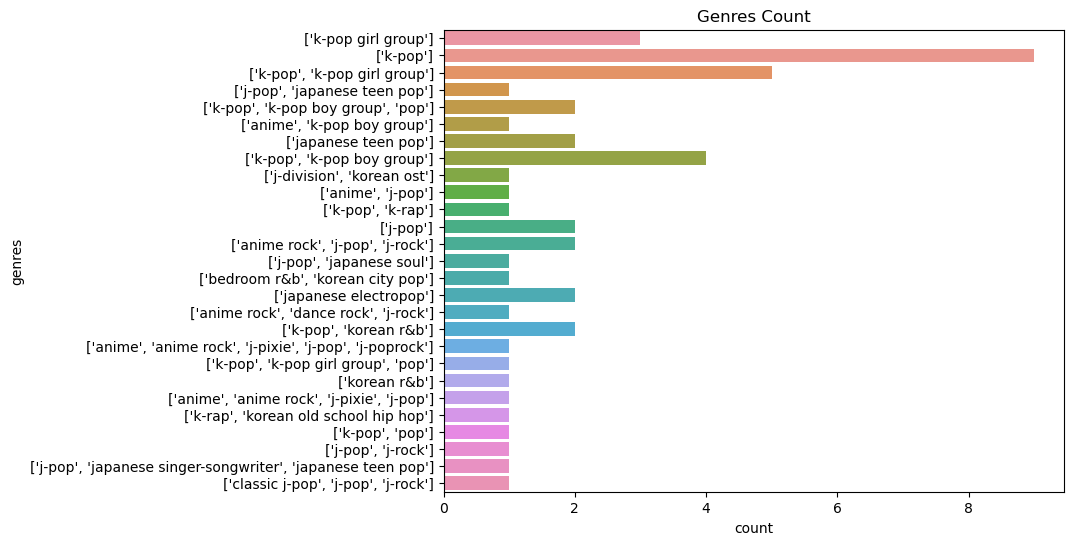

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(y=top_50['genres']).set(title='Genres Count')
plt.show()

There are a lot of "k-pop" genred songs. However, some of the songs belong to more than just one genre.

Eg: the song Queencard by (G)-Idle has genre as ['k-pop', 'k-pop girl group']

The genre 'k-pop girl group' is unnecessary because that level of detailing is not required for our analysis. So, we replace these extra detailing with just genre as 'k-pop'

In the end, we get straightforward genres as follows:
 - kpop
 - jpop
 - other groups of genres 

In [42]:
#checking the count of songs with genre as mentioned above
top_50[top_50['genres'].str.contains('k-pop')].count()

artist_name               29
popularity                29
followers                 29
genres                    29
top_track                 29
top_track_popularity      29
top_track_release_date    29
top_track_duration_ms     29
top_track_explicit        29
dtype: int64

In [36]:
#finding out the songs that does not belong to the genre "k-pop"
top_50[~top_50['genres'].str.contains('k-pop')]

,artist_name,popularity,followers,genres,top_track,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit
18,YOASOBI,76,5945744,"['j-pop', 'japanese teen pop']",アイドル,91.0,2023-04-12,213233.0,False
58,Fujii Kaze,72,2399516,['japanese teen pop'],Shinunoga E-Wa,87.0,2020-05-20,185573.0,False
4,V,66,14088149,"['j-division', 'korean ost']",Christmas Tree,84.0,2021-12-24,209946.0,False
23,Kenshi Yonezu,71,5112482,"['anime', 'j-pop']",KICK BACK,84.0,2022-10-12,193495.0,False
185,milet,64,615291,['j-pop'],絆ノ奇跡,83.0,2023-04-10,223320.0,False
131,MAN WITH A MISSION,64,1002451,"['anime rock', 'j-pop', 'j-rock']",絆ノ奇跡,83.0,2023-04-10,223320.0,False
76,Vaundy,70,1731531,"['j-pop', 'japanese soul']",怪獣の花唄,81.0,2020-05-27,224806.0,False
197,wave to earth,68,524359,"['bedroom r&b', 'korean city pop']",seasons,81.0,2020-08-04,256000.0,False
336,Tatsuya Kitani,63,189060,['japanese electropop'],青のすみか,81.0,2023-07-07,196466.0,False
279,QUEEN BEE,60,302723,"['anime rock', 'dance rock', 'j-rock']",メフィスト,80.0,2023-04-20,227320.0,False


In [37]:
# checking for songs under genre "j-pop"
top_50[top_50['genres'].str.contains('j-pop')].count()

artist_name               12
popularity                12
followers                 12
genres                    12
top_track                 12
top_track_popularity      12
top_track_release_date    12
top_track_duration_ms     12
top_track_explicit        12
dtype: int64

In [44]:
# finding the count for other genres
top_50[top_50['genres'].str.contains('k-pop|j-pop') == False].count()

artist_name               9
popularity                9
followers                 9
genres                    9
top_track                 9
top_track_popularity      9
top_track_release_date    9
top_track_duration_ms     9
top_track_explicit        9
dtype: int64

__Summary:__
 - k-pop has 29 songs
 - j-pop has 12 songs
 - other genres have 9 songs

In [39]:
# assigning new values to the genres
top_50.loc[top_50['genres'].str.contains('k-pop', case=False), 'genres'] = 'k-pop' 
top_50.loc[top_50['genres'].str.contains('j-pop', case=False), 'genres'] = 'j-pop'
top_50

,artist_name,popularity,followers,genres,top_track,top_track_popularity,top_track_release_date,top_track_duration_ms,top_track_explicit
128,FIFTY FIFTY,77,1040052,k-pop,Cupid - Twin Ver.,98.0,2023-02-24,174253.0,False
8,Jung Kook,84,8656152,k-pop,Seven (feat. Latto) (Explicit Ver.),97.0,2023-07-14,184400.0,True
16,Jimin,83,6227865,k-pop,Like Crazy,96.0,2023-03-24,212241.0,False
31,NewJeans,80,4130164,k-pop,Super Shy,93.0,2023-07-07,154666.0,False
18,YOASOBI,76,5945744,j-pop,アイドル,91.0,2023-04-12,213233.0,False
15,(G)I-DLE,76,6534936,k-pop,Queencard,90.0,2023-05-15,161240.0,False
5,Stray Kids,82,11990935,k-pop,S-Class,89.0,2023-06-02,195688.0,False
17,ENHYPEN,76,6039057,k-pop,Bite Me,89.0,2023-05-22,157531.0,False
51,LE SSERAFIM,76,2620665,k-pop,UNFORGIVEN (feat. Nile Rodgers),88.0,2023-05-01,182148.0,False
54,IVE,75,2488380,k-pop,I AM,88.0,2023-04-10,183853.0,False


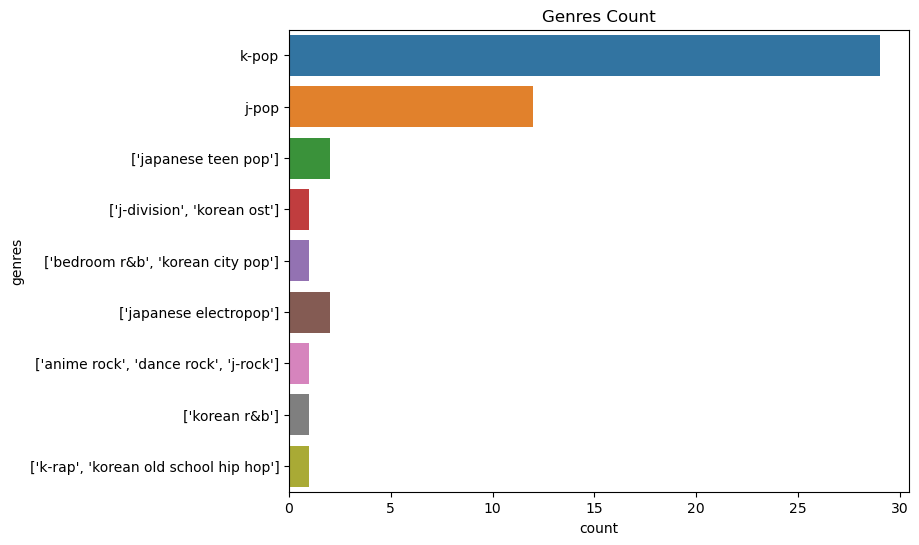

In [45]:
# plotting the genre count again
plt.figure(figsize=(8,6))
sns.countplot(data=top_50,y='genres').set(title='Genres Count')
plt.show()

In [47]:
top_50.genres.unique()

array(['k-pop', 'j-pop', "['japanese teen pop']",
       "['j-division', 'korean ost']",
       "['bedroom r&b', 'korean city pop']", "['japanese electropop']",
       "['anime rock', 'dance rock', 'j-rock']", "['korean r&b']",
       "['k-rap', 'korean old school hip hop']"], dtype=object)

In [50]:
top_50[top_50['genres'].str.contains('j-division', 'korean ost')].count()

artist_name               1
popularity                1
followers                 1
genres                    1
top_track                 1
top_track_popularity      1
top_track_release_date    1
top_track_duration_ms     1
top_track_explicit        1
dtype: int64

We can see that the top most popular genre is __k-pop__.

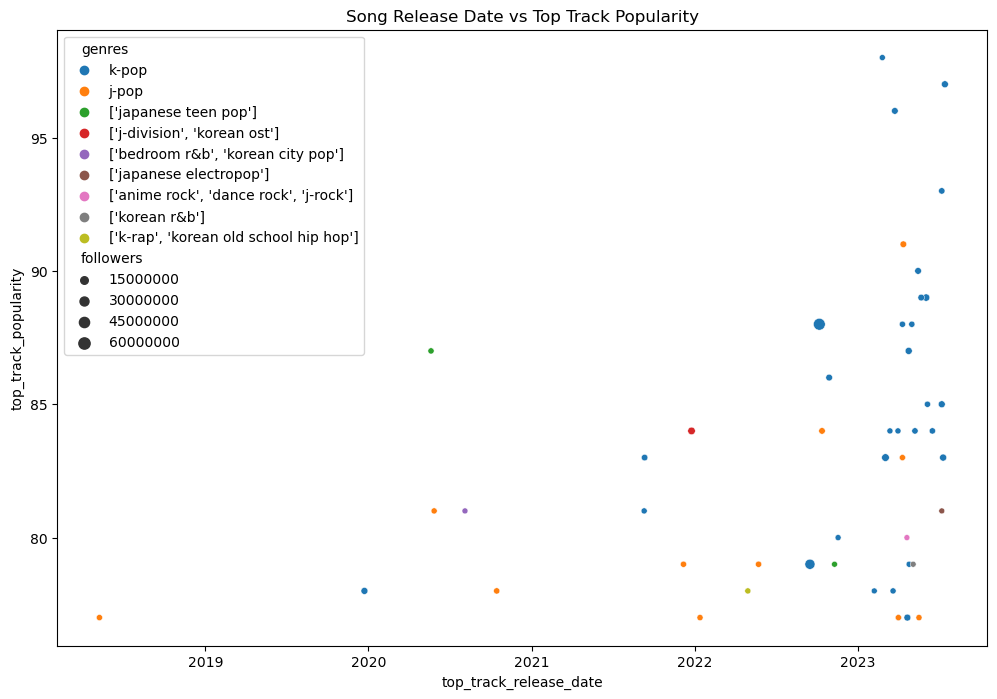

0.3252446376129646

In [63]:
# relationship between song release date vs top track popularity

plt.figure(figsize=(12,8))
plt.ticklabel_format(style = 'plain')
sns.scatterplot(data=top_50, x='top_track_release_date', 
                y='top_track_popularity', hue='genres', size='followers').set(title='Song Release Date vs Top Track Popularity')
plt.show()

# calculating the correlation coeficient
x= pd.to_numeric(top_50['top_track_release_date'], errors='coerce')
y= pd.to_numeric(top_50['top_track_popularity'], errors='coerce')

corr = x.corr(y)
corr

The data points are scattered, not closely clustered with no pattern formation, thus indicating no relationship between the release date of a track and its popularity.

The correlation coefficient is also closer to 0, indicating no relationship and even if there's one, it would be a weak relationship

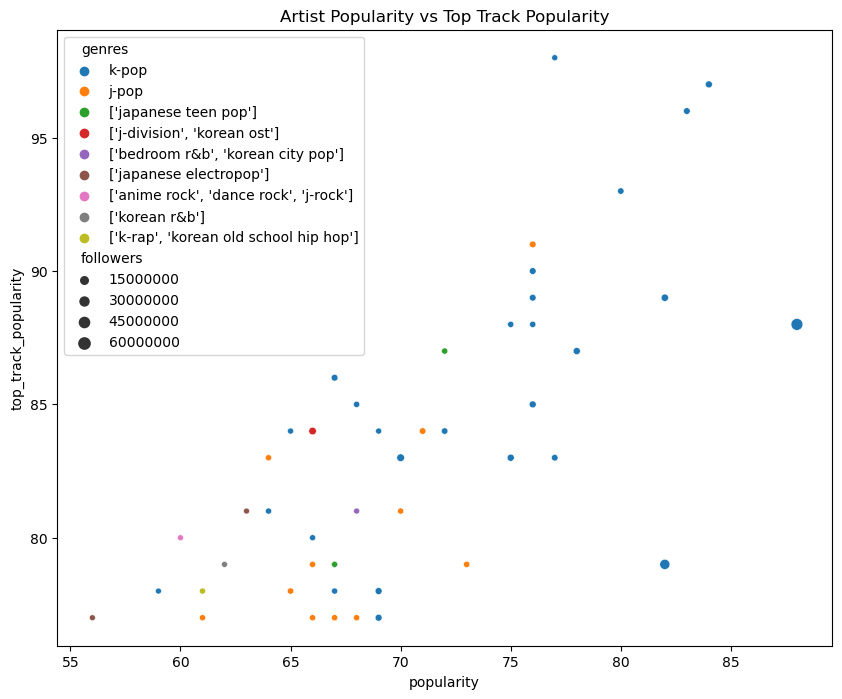

0.7197249933937374

In [60]:
# relationship between artist popularity vs top track popularity
plt.figure(figsize=(10,8))
sns.scatterplot(data=top_50, x='popularity', y='top_track_popularity',
                hue='genres', size='followers').set(title='Artist Popularity vs Top Track Popularity')
plt.show()


# calculating the correlation coeficient
x= pd.to_numeric(top_50['popularity'], errors='coerce')
y= pd.to_numeric(top_50['top_track_popularity'], errors='coerce')

corr = x.corr(y)
corr

We can clearly see a positive correlation indicating that the popularity of artist is strongly dependant on the popularity of the song.

The correlation coefficient is closer to 1, indicating the same.

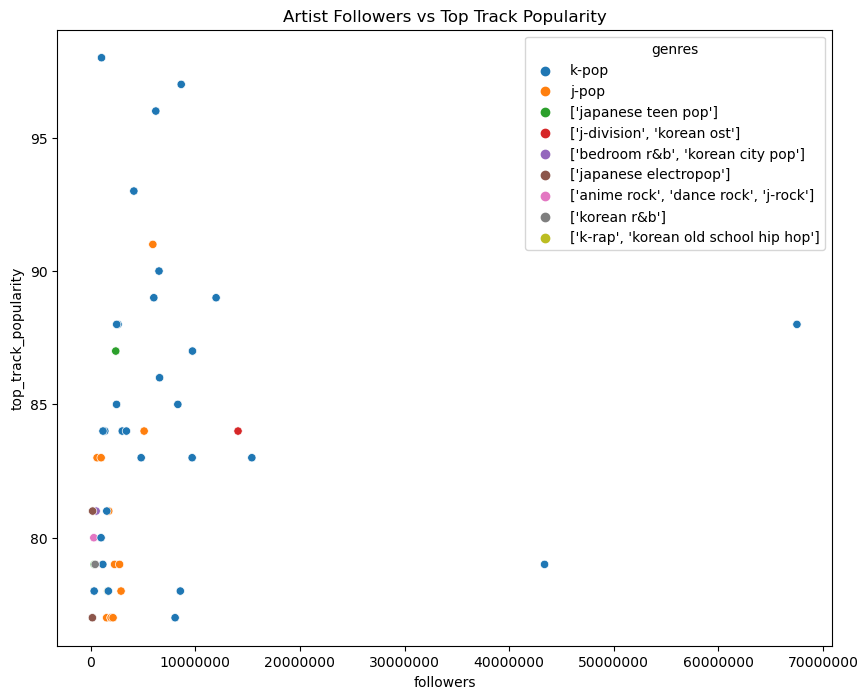

0.15462176740529676

In [61]:
# relationship between artist followers vs top track popularity
plt.figure(figsize=(10,8))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=top_50, x='followers', y='top_track_popularity', hue='genres').set(title='Artist Followers vs Top Track Popularity')
plt.show()

# calculating the correlation coeficient
x= pd.to_numeric(top_50['followers'], errors='coerce')
y= pd.to_numeric(top_50['top_track_popularity'], errors='coerce')

corr = x.corr(y)
corr

The data points are scattered with no patern formation, thus indicating no relationship between number of followers and the popularity of the song. The correlation coefficient is very close to 0, indicating the same.

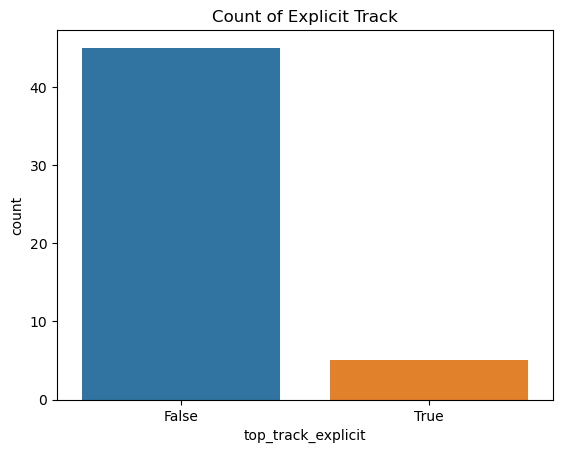

In [64]:
# checking the number of explicit songs in top 50 dataset
sns.countplot(data=top_50, x='top_track_explicit').set(title='Count of Explicit Track')
plt.show()

The number of top songs that has explicit lyrics is less than 10,indicating that the song need not have explicit lyrics for it to be popular.